* You must include a written description of three observable trends based on the data.

* By comparing the three target drugs (Capomulin, Infubinol, and Ketapril) with the placebo, it can be concluded that 

* After 45 days of treatment, the tumor volume significantly reduces with Capomulin treatment (reduced by 19% comparing to the initial tumor volume), while the treatments Infubinol and Ketapril did not reduce the tumor size.

* By comparing metastatic spread during each treatments, Ketapril showed no effect on controlling metastatic spread. Infubinol group showed significantly reduced metastatic site growth rate. Capomulin group showed the most significant effect on controlling metastatic spread.

* Among the 100 mouse test subjects, the mouse group with Capomulin treatment showed significantly high survival rate at 84%. Ketapril group has the same survival rate as the placebo group. Infubinol group has the lowest survival rate.



In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mousedrug=pd.read_csv(mouse_drug_data_to_load)
df_clinicaltrial=pd.read_csv(clinical_trial_data_to_load)
#df_mousedrug.head()
#df_clinicaltrial.head()

# Combine the data into a single dataset
df_combine=pd.merge(df_clinicaltrial,df_mousedrug, on="Mouse ID")
df_combine=df_combine.sort_values(["Drug","Timepoint","Mouse ID"]).reset_index(drop=True)

# Display the data table for preview
df_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,b742,0,45.0,0,Capomulin
2,f966,0,45.0,0,Capomulin
3,g288,0,45.0,0,Capomulin
4,g316,0,45.0,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

TumorVolume_mean=df_combine.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
#TumorVolume_mean

# Convert to DataFrame
df_TumorVolume_mean=pd.DataFrame(TumorVolume_mean).reset_index()
# Preview DataFrame
df_TumorVolume_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
TumorVolume_sem=df_combine.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
TumorVolume_sem
# Convert to DataFrame
df_TumorVolume_sem=pd.DataFrame(TumorVolume_sem).reset_index()
# Preview DataFrame
df_TumorVolume_sem.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
df_meanpivot = df_combine.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc='mean')
df_standerrorpivot = df_combine.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc='sem')

# Preview that Reformatting worked
df_meanpivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


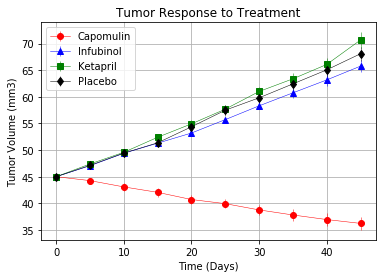

In [5]:
# Generate the Plot (with Error Bars)

df_cleanmean=pd.DataFrame(df_meanpivot).reset_index()
df_cleanstanderror=pd.DataFrame(df_standerrorpivot).reset_index()

#df_cleanmean.head()
x_axis=df_combine['Timepoint'].unique()
DrugList=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


fig, ax = plt.subplots()
ax.errorbar(x_axis,df_cleanmean['Capomulin'],df_cleanstanderror['Capomulin'],linewidth=0.5, marker ='o', color='red')
ax.errorbar(x_axis,df_cleanmean['Infubinol'],df_cleanstanderror['Infubinol'],linewidth=0.5, marker ='^', color='blue')
ax.errorbar(x_axis,df_cleanmean['Ketapril'],df_cleanstanderror['Ketapril'],linewidth=0.5, marker ='s', color='green')
ax.errorbar(x_axis,df_cleanmean['Placebo'],df_cleanstanderror['Placebo'],linewidth=0.5, marker ='d', color='black')

ax.legend(loc='upper left')
ax.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
# Save the Figure
plt.savefig("../Images/Tumor Response to Treatment.png")

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MetSite_mean=df_combine.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()


# Convert to DataFrame
df_MetSite_mean=pd.DataFrame(MetSite_mean)

# Preview DataFrame
df_MetSite_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MetSite_sem=df_combine.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
df_MetSite_sem=pd.DataFrame(MetSite_sem)

# Preview DataFrame
df_MetSite_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
df_MetSite_meanpivot = df_combine.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc='mean')
df_MetSite_standerrorpivot = df_combine.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc='sem')

# Preview that Reformatting worked
df_MetSite_meanpivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


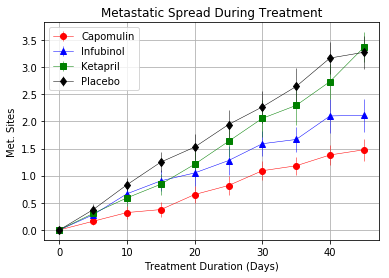

In [10]:
# Generate the Plot (with Error Bars)

df_MetSite_cleanmean=pd.DataFrame(df_MetSite_meanpivot).reset_index()
df_MetSite_cleanstanderror=pd.DataFrame(df_MetSite_standerrorpivot).reset_index()

#df_cleanmean.head()
x_axis=df_combine['Timepoint'].unique()
DrugList=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


fig, ax = plt.subplots()
ax.errorbar(x_axis,df_MetSite_cleanmean['Capomulin'],df_MetSite_cleanstanderror['Capomulin'],linewidth=0.5, marker ='o', color='red')
ax.errorbar(x_axis,df_MetSite_cleanmean['Infubinol'],df_MetSite_cleanstanderror['Infubinol'],linewidth=0.5, marker ='^', color='blue')
ax.errorbar(x_axis,df_MetSite_cleanmean['Ketapril'],df_MetSite_cleanstanderror['Ketapril'],linewidth=0.5, marker ='s', color='green')
ax.errorbar(x_axis,df_MetSite_cleanmean['Placebo'],df_MetSite_cleanstanderror['Placebo'],linewidth=0.5, marker ='d', color='black')

ax.legend(loc='upper left')
ax.grid()
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
# Save the Figure
plt.savefig("../Images/Metastatic Spread During Treatment.png")

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MouseCount=df_combine.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
df_MouseCount=pd.DataFrame(MouseCount).reset_index()

# Preview DataFrame
df_MouseCount.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
df_MouseCount_pivot = df_combine.pivot_table(index='Timepoint', columns='Drug', values='Mouse ID', aggfunc='count')

# Preview that Reformatting worked
df_MouseCount_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


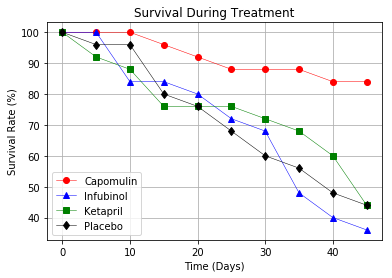

In [16]:
# Generate the Plot (Accounting for percentages)

df_MouseCount_clean=pd.DataFrame(df_MouseCount_pivot).reset_index()
df_MouseCount_percent=df_MouseCount_clean/df_MouseCount_clean.max()*100
#df_MouseCount_percent
#df_cleanmean.head()
x_axis=df_combine['Timepoint'].unique()
DrugList=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


fig, ax = plt.subplots()
ax.plot(x_axis,df_MouseCount_percent['Capomulin'],linewidth=0.5, marker ='o', color='red')
ax.plot(x_axis,df_MouseCount_percent['Infubinol'],linewidth=0.5, marker ='^', color='blue')
ax.plot(x_axis,df_MouseCount_percent['Ketapril'],linewidth=0.5, marker ='s', color='green')
ax.plot(x_axis,df_MouseCount_percent['Placebo'],linewidth=0.5, marker ='d', color='black')

ax.legend(loc='lower left')
ax.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
# Save the Figure
plt.savefig("../Images/Survival During Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
DrugType=df_combine['Drug'].unique()
changes=[]
for drug in DrugType:
    change=(df_cleanmean[drug][len(df_cleanmean[drug])-1]-df_cleanmean[drug][0])/df_cleanmean[drug][0]*100
    change=change.astype(float).round(6)
    changes.append(change)

df_change=pd.DataFrame({"Drug":DrugType,"Changes":changes})

# Display the data to confirm
print(df_change)



        Drug    Changes
0  Capomulin -19.475303
1   Ceftamin  42.516492
2  Infubinol  46.123472
3   Ketapril  57.028795
4   Naftisol  53.923347
5    Placebo  51.297960
6   Propriva  47.241175
7   Ramicane -22.320900
8   Stelasyn  52.085134
9  Zoniferol  46.579751


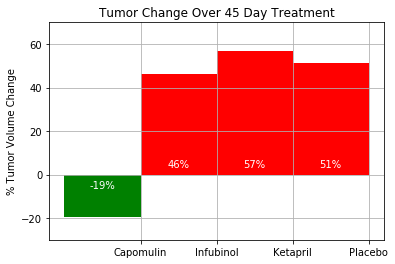

In [15]:
# Store all Relevant Percent Changes into a Tuple
DrugList=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
df_changeloc=df_change.set_index('Drug')
ChangeList=(df_changeloc.loc['Capomulin','Changes'], 
            df_changeloc.loc['Infubinol','Changes'],
            df_changeloc.loc['Ketapril','Changes'],
            df_changeloc.loc['Placebo','Changes'])
df_changelist=pd.DataFrame({"Drug":DrugList,
                           "Change":ChangeList})
#df_changelist
# Splice the data between passing and failing drugs
# bins=[df_changelist['Change'].min()-5,0,df_changelist['Change'].max()]
# group_names=["Pass","Fail"]
# df_changelist["P/F"] = pd.cut(df_changelist['Change'],bins,labels=group_names)
# df_changelist


mask1 = df_changelist['Change'] < 0
mask2 = df_changelist['Change'] >= 0




# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(df_changelist['Change']))
tick_locations = [value for value in x_axis]

fig, ax = plt.subplots()

ax.bar(x_axis[mask1], df_changelist['Change'][mask1], color = 'green',align="center",width=1)
ax.bar(x_axis[mask2], df_changelist['Change'][mask2], color = 'red',align="center",width=1)

ax.set_xticks(x_axis+0.5)
ax.set_xticklabels(df_changelist['Drug'])
ax.set_ylim(-30,70)
ax.grid()
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")



# Use functions to label the percentages of changes

def autolabel(x_axis):
    """
    Attach a text label on each bar
    """
    for value in x_axis:
        if df_changelist['Change'][value]>=0:
            height = 5
        else: 
            height = -5
        plt.text(value,height,f"{int(df_changelist['Change'][value])}%",color = 'white',ha='center',va='center')

# Call functions to implement the function calls
autolabel(x_axis)

# Save the Figure

plt.savefig("../Images/Tumor Change Over 45 Day Treatment.png")

# Show the Figure
fig.show()